In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
raw_data = pd.read_csv('GBvideos.csv')
raw_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [11]:
raw_data.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
dtype: int64

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
video_id                  38916 non-null object
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.0+ MB


In [13]:
data = raw_data.copy()

### Which channel got most likes?

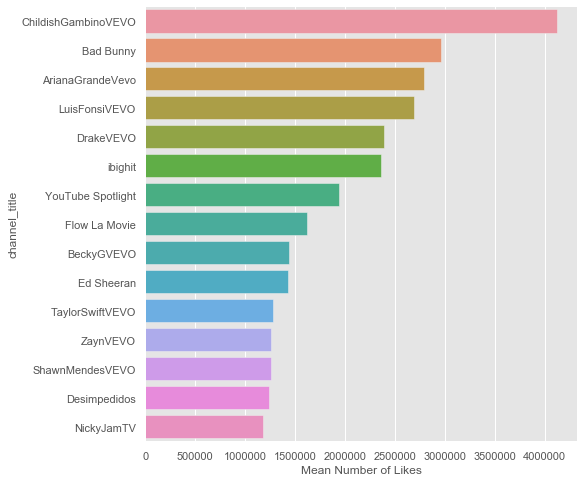

In [14]:
plt.style.use('ggplot')
disliked = pd.DataFrame(data.groupby(["channel_title"])["likes"].agg('mean').sort_values(ascending=False))[:15]
plt.figure(figsize=(10,8))
sns.barplot(y=disliked.index, x=disliked.likes, data=disliked)
plt.gca().set_xlabel('Mean Number of Likes')
plt.gcf().subplots_adjust(left=.3)
plt.show()

### Likes, dislikes, comments for ChildishGambinoVEVO

In [43]:
cg = data[data['channel_title'] == "TaylorSwiftVEVO"][['likes', 'dislikes', 'publish_time', 'comment_count']].reset_index()
cg['publish_time'] = cg['publish_time'].apply(lambda x: pd.to_datetime(x[:10]))

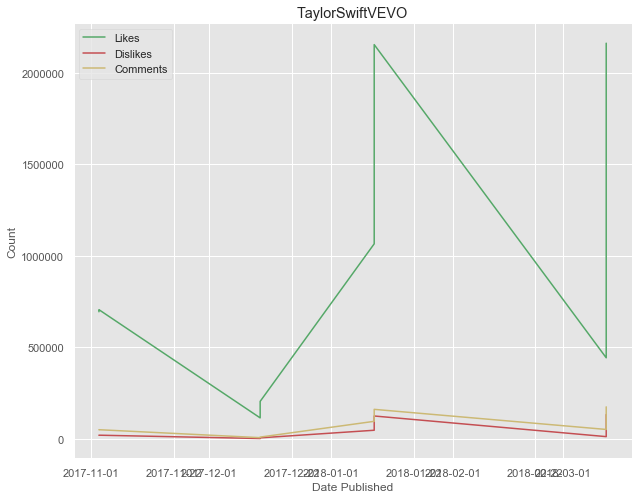

In [45]:
plt.figure(figsize=(10,8))
plt.plot(cg['publish_time'], cg['likes'], color='g', label='Likes')
plt.plot(cg['publish_time'], cg['dislikes'], color='r', label='Dislikes')
plt.plot(cg['publish_time'], cg['comment_count'], color='y', label='Comments')

plt.gca().set_xlabel("Date Published")
plt.gca().set_ylabel("Count")
plt.gca().set_title("TaylorSwiftVEVO")
plt.legend()
plt.show()

### Which channel gets its videos trending quickly?

In [50]:
trending = data[['publish_time', 'trending_date', 'channel_title']]
trending = trending.copy()

trending['publish_time'] = trending['publish_time'].apply(lambda x: pd.to_datetime(x).date())
trending['trending_date'] = trending['trending_date'].apply(lambda x: pd.to_datetime(x, format= "%y.%d.%m").date())

trending['days'] = (trending['trending_date'] - trending['publish_time'])
trending.sort_values(by='days')
trending['days'] = trending.days.apply(lambda x: x.days)

mean = pd.DataFrame(trending.groupby('channel_title')['days'].agg('mean').sort_values())
mean[mean['days'] <= 1]

,days
channel_title,
gameslice,0.5
GameSpot,0.5
America's Got Talent,0.5
Cute Girl Videos,1.0
Dale Dai,1.0
zander,1.0
FPFutebolOficial,1.0
Breathe Paradise,1.0


### Which channels took more than an year to make their videos as trending?

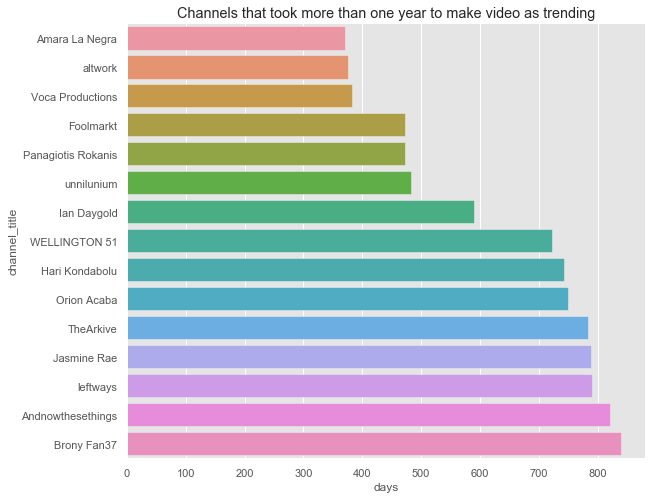

In [56]:
year = mean[mean["days"]>365][:15]

plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.barplot(y=year.index, x=year["days"])
plt.gcf().subplots_adjust(left=.3)
plt.gca().set_title("Channels that took more than one year to make video as trending")
plt.gcf().savefig("more_than_an_year")
plt.show()